서울시 구별 범죄현황

In [11]:
#데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

criminal = pd.read_csv('c://programming/python/pandasdata/crime.txt', sep='\t', thousands=',', encoding='utf-8')
print(criminal.head(5))
criminal.info()

     기간  자치구    합계발생   합계검거  살인발생  살인검거  강도발생  강도검거  강간발생  강간검거   절도발생   절도검거  \
0  2016   합계  117839  84421   148   147   262   257  6002  5565  46857  22566   
1  2016  종로구    4459   4298     6     5    12    14   238  1106   1940   1020   
2  2016   중구    4584   3068     3     3     8     7   198   148   2150    914   
3  2016  용산구    4137   2835     4     4     9    10   251   214   1489    599   
4  2016  성동구    3026   2392     4     5     3     5   104    78   1296    896   

    폭력발생   폭력검거  
0  64570  55886  
1   2263   2153  
2   2225   1996  
3   2384   2008  
4   1619   1408  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      26 non-null     int64 
 1   자치구     26 non-null     object
 2   합계발생    26 non-null     int64 
 3   합계검거    26 non-null     int64 
 4   살인발생    26 non-null     int64 
 5   살인검거    26 non-null     int64 
 6   강도발생    2

불필요한 행과 컬럼 제거

In [12]:
#불필요한 컬럼 제거하기
criminal.drop(['기간', '합계검거', '살인검거', '강도검거', '강간검거', '절도검거', '폭력검거'], axis=1, inplace=True)
criminal.drop([0], inplace=True)
               
#컬럼 이름 설정
criminal.rename(columns={'살인발생':'살인', '강도발생':'강도', '강간발생':'강간', '절도발생':'절도', 
                         '폭력발생':'폭력'}, inplace=True)
print(criminal.head(5))

   자치구  합계발생  살인  강도   강간    절도    폭력
1  종로구  4459   6  12  238  1940  2263
2   중구  4584   3   8  198  2150  2225
3  용산구  4137   4   9  251  1489  2384
4  성동구  3026   4   3  104  1296  1619
5  광진구  5322   4  11  279  2636  2392


인구수 통합

In [13]:
pop = pd.read_csv('c://programming/python/pandasdata/pop.txt', encoding='utf-8', skiprows=2, delimiter='\t',
thousands=',')
pop = pop[['자치구', '계']]
print(pop.head(5))
print()

df = pd.merge(criminal, pop)
print(df.head())

   자치구        계
0   합계  9736027
1  종로구   153789
2   중구   131787
3  용산구   237285
4  성동구   292672

   자치구  합계발생  살인  강도   강간    절도    폭력       계
0  종로구  4459   6  12  238  1940  2263  153789
1   중구  4584   3   8  198  2150  2225  131787
2  용산구  4137   4   9  251  1489  2384  237285
3  성동구  3026   4   3  104  1296  1619  292672
4  광진구  5322   4  11  279  2636  2392  352627


In [ ]:
인구 수 대비 범죄율 계산

In [14]:
df['강간발생율'] = df['강간']/df['계']
df['강도발생율'] = df['강도']/df['계']
df['절도발생율'] = df['절도']/df['계']
df['폭력발생율'] = df['폭력']/df['계']
df['살인발생율'] = df['살인']/df['계']
print(df.head())

   자치구  합계발생  살인  강도   강간    절도    폭력       계     강간발생율     강도발생율     절도발생율  \
0  종로구  4459   6  12  238  1940  2263  153789  0.001548  0.000078  0.012615   
1   중구  4584   3   8  198  2150  2225  131787  0.001502  0.000061  0.016314   
2  용산구  4137   4   9  251  1489  2384  237285  0.001058  0.000038  0.006275   
3  성동구  3026   4   3  104  1296  1619  292672  0.000355  0.000010  0.004428   
4  광진구  5322   4  11  279  2636  2392  352627  0.000791  0.000031  0.007475   

      폭력발생율     살인발생율  
0  0.014715  0.000039  
1  0.016883  0.000023  
2  0.010047  0.000017  
3  0.005532  0.000014  
4  0.006783  0.000011  


cctv 데이터 읽어오기

In [20]:
cctv = pd.read_excel('c://programming/python/pandasdata/cctv.xlsx')
cctv.head()
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non-null     int64 
 3   2012년     26 non-null     int64 
 4   2013년     26 non-null     int64 
 5   2014년     26 non-null     int64 
 6   2015년     26 non-null     int64 
 7   2016년     26 non-null     int64 
 8   2017년     26 non-null     int64 
 9   2018년     26 non-null     int64 
 10  2019년     26 non-null     int64 
 11  2020년     26 non-null     int64 
 12  2021년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non

In [22]:
cctv.rename(columns={cctv.columns[0] : '기관명'}, inplace=True)
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기관명       26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non-null     int64 
 3   2012년     26 non-null     int64 
 4   2013년     26 non-null     int64 
 5   2014년     26 non-null     int64 
 6   2015년     26 non-null     int64 
 7   2016년     26 non-null     int64 
 8   2017년     26 non-null     int64 
 9   2018년     26 non-null     int64 
 10  2019년     26 non-null     int64 
 11  2020년     26 non-null     int64 
 12  2021년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [26]:
#필요한 열만 선택
cctv = cctv[['기관명', '총계']]

#기관명의 공백 제거
gu = []
for x in cctv['기관명']:
    gu.append(x.replace(' ', ''))

cctv['기관명'] = gu

cctv.head()

,기관명,총계
0,계,77032
1,종로구,1772
2,중구,2333
3,용산구,2383
4,성동구,3602


cctv와 df의 join - df의 자치구와 cctv의 기관명으로 조인

In [28]:
df = pd.merge(df, cctv, left_on='자치구', right_on='기관명')
df.head()

,자치구,합계발생,살인,강도,강간,절도,폭력,계,강간발생율,강도발생율,절도발생율,폭력발생율,살인발생율,기관명_x,총계_x,기관명_y,총계_y
0,종로구,4459,6,12,238,1940,2263,153789,0.001548,0.000078,0.012615,0.014715,0.000039,종로구,1772,종로구,1772
1,중구,4584,3,8,198,2150,2225,131787,0.001502,0.000061,0.016314,0.016883,0.000023,중구,2333,중구,2333
2,용산구,4137,4,9,251,1489,2384,237285,0.001058,0.000038,0.006275,0.010047,0.000017,용산구,2383,용산구,2383
3,성동구,3026,4,3,104,1296,1619,292672,0.000355,0.000010,0.004428,0.005532,0.000014,성동구,3602,성동구,3602
4,광진구,5322,4,11,279,2636,2392,352627,0.000791,0.000031,0.007475,0.006783,0.000011,광진구,2588,광진구,2588


In [30]:
#인덱스 설정
df = pd.pivot_table(df, index='자치구', aggfunc=np.sum)
print(df)

       강간     강간발생율  강도     강도발생율       계  살인     살인발생율    절도     절도발생율  총계_x  \
자치구                                                                             
강남구   516  0.000959  39  0.000073  537800   5  0.000009  3587  0.006670  6502   
강동구   160  0.000343  14  0.000030  466472   4  0.000009  1754  0.003760  2547   
강북구   217  0.000717   5  0.000017  302563   7  0.000023  1222  0.004039  2462   
강서구   275  0.000474  10  0.000017  579768   9  0.000016  1952  0.003367  2560   
관악구   322  0.000645  12  0.000024  499449   6  0.000012  2103  0.004211  4942   
광진구   279  0.000791  11  0.000031  352627   4  0.000011  2636  0.007475  2588   
구로구   273  0.000648  10  0.000024  421163   9  0.000021  1910  0.004535  4075   
금천구   175  0.000715   7  0.000029  244891   6  0.000025  1264  0.005161  2374   
노원구   159  0.000309   6  0.000012  514946   5  0.000010  1857  0.003606  2415   
도봉구   123  0.000385   5  0.000016  319373   3  0.000009   866  0.002712  1629   
동대문구  190  0.000540  10  0.0

데이터 표준화
#가장 큰 데이터를 1.0으로 하고 가장 작은 데이터를 0.0으로 설정해서 값을 만들기

In [37]:
#강간발생율, 강도발생율, 살인발생율, 절도발생율, 폭력발생율을 MinMaxScalling
from sklearn import preprocessing

col = ['강간발생율', '강도발생율', '살인발생율', '절도발생율', '폭력발생율']

#numpy의 배열로 추출
x = df[col].values
x

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

criminal_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)
print(criminal_norm)

         강간발생율     강도발생율     살인발생율     절도발생율     폭력발생율
자치구                                                   
강남구   0.532049  0.918686  0.023723  0.290988  0.254871
강동구   0.041538  0.291569  0.000000  0.077086  0.095636
강북구   0.339288  0.092582  0.478348  0.097574  0.392197
강서구   0.146033  0.103246  0.228271  0.048175  0.103737
관악구   0.281604  0.203251  0.112953  0.110205  0.178771
광진구   0.398167  0.309007  0.090948  0.350208  0.202938
구로구   0.284385  0.199080  0.420322  0.134055  0.260482
금천구   0.337217  0.270495  0.523192  0.180106  0.374318
노원구   0.014302  0.020675  0.037279  0.065770  0.053199
도봉구   0.075060  0.079749  0.026886  0.000000  0.023685
동대문구  0.198099  0.267905  0.184934  0.205821  0.259931
동작구   0.424351  0.110650  0.384725  0.029203  0.000000
마포구   0.606986  0.004610  0.065304  0.291231  0.280094
서대문구  0.209742  0.082467  0.342741  0.150699  0.161629
서초구   0.586927  0.309642  0.112991  0.190168  0.110965
성동구   0.051362  0.000000  0.167288  0.126196  0.104167
성북구   0.04

In [39]:
#데이터 복사
#df의 강간, 강도, 살인, 절도, 폭력, 계, 소계를 추가
col = ['강간', '강도', '살인', '절도', '폭력', '계', '합계발생']

criminal_norm[col] = df[col]

criminal_norm

,강간발생율,강도발생율,살인발생율,절도발생율,폭력발생율,강간,강도,살인,절도,폭력,계,합계발생
자치구,,,,,,,,,,,,
강남구,0.532049,0.918686,0.023723,0.290988,0.254871,516,39,5,3587,4002,537800,8149
강동구,0.041538,0.291569,0.000000,0.077086,0.095636,160,14,4,1754,2530,466472,4462
강북구,0.339288,0.092582,0.478348,0.097574,0.392197,217,5,7,1222,2778,302563,4229
강서구,0.146033,0.103246,0.228271,0.048175,0.103737,275,10,9,1952,3204,579768,5450
관악구,0.281604,0.203251,0.112953,0.110205,0.178771,322,12,6,2103,3235,499449,5678
광진구,0.398167,0.309007,0.090948,0.350208,0.202938,279,11,4,2636,2392,352627,5322
구로구,0.284385,0.199080,0.420322,0.134055,0.260482,273,10,9,1910,3164,421163,5366
금천구,0.337217,0.270495,0.523192,0.180106,0.374318,175,7,6,1264,2193,244891,3645
노원구,0.014302,0.020675,0.037279,0.065770,0.053199,159,6,5,1857,2516,514946,4543


상관 관계 파악(시각화)

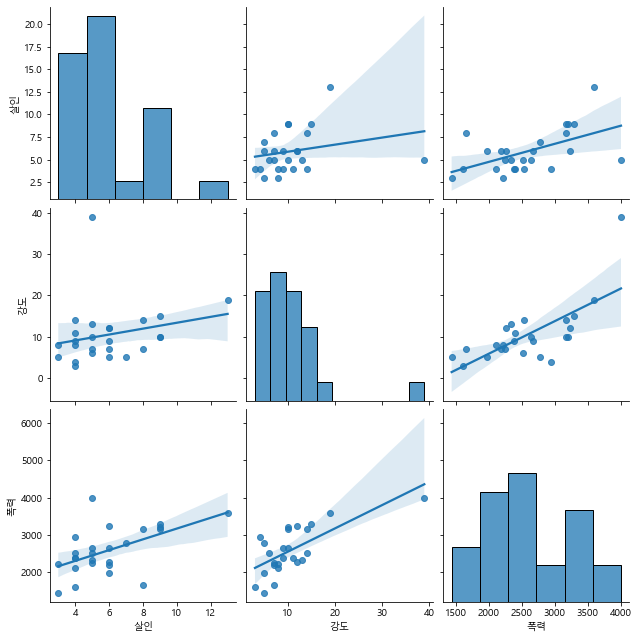

In [42]:
#강도, 살인, 폭력 의 상관관계 그래프 만들기
import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

sns.pairplot(criminal_norm, vars=["살인", "강도", "폭력"], kind='reg', height=3)
plt.show()

<AxesSubplot:ylabel='자치구'>

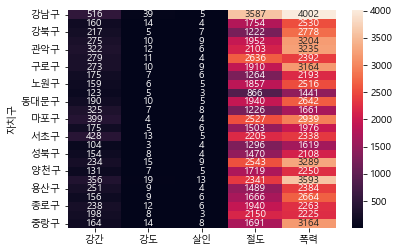

In [46]:
#표준화하지 않은 데이터를 가지고 heatmap 생성
#강간, 강도, 살인, 절도, 폭력
#sns.heatmap(criminal_norm[['강간', '강도', '살인', '절도', '폭력']], annot=True, fmt='f')
sns.heatmap(criminal_norm[['강간', '강도', '살인', '절도', '폭력']], annot=True, fmt='d')

#데이터가 표준화되지 않았고 강도와 살인의 크기는 거의 없음

<AxesSubplot:ylabel='자치구'>

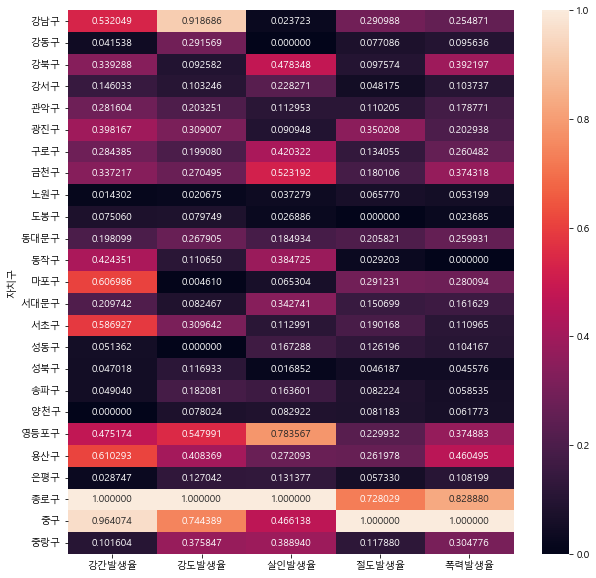

In [50]:
#표준화를 수행한 데이터를 가지고 heatmap 생성
#강간발생율, 강도발생율, 살인발생율, 절도발생율, 폭력발생율
plt.figure(figsize=(10, 10))
sns.heatmap(criminal_norm[['강간발생율', '강도발생율', '살인발생율', '절도발생율', '폭력발생율']],
           annot=True, fmt='f')